فائدة هذا النموذج:
تحديد الأسر المتعثرة ماليًا
التنبؤ بالعائلات أو الأسر التي قد تتعثر ماليًا.

اتخاذ قرارات مبكرة:
إذا تم استخدامه في الوقت المناسب، يمكن للمؤسسات أن تتدخل بشكل مبكر وتقدم الدعم المناسب قبل حدوث التعثر المالي.

تحسين تخصيص الموارد:
من خلال معرفة الأسر التي قد تتعثر ماليًا، يمكن للمؤسسات تحسين تخصيص مواردها بشكل أفضل. على سبيل المثال، توفير برامج تعليم مالي أو دعم مالي للأسر الأكثر عرضة للخطر.

استخدامه في التخطيط الاستراتيجي:
يمكن أن يساعد هذا النموذج على نطاق أوسع في تحسين التخطيط الاستراتيجي للسياسات العامة، مثل تخطيط الدعم المالي أو تطوير سياسات اقتصادية تستهدف الأسر الأكثر حاجة.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving PastRList.xlsx to PastRList.xlsx


In [ ]:

df = pd.read_excel('PastRList.xlsx')


In [ ]:
df.columns = df.columns.str.strip()

# الأعمدة الفئوية التي نحتاج لتحويلها إلى أرقام
label_cols = ['الحالة الاجتماعية', 'الحالة الصحية', 'المنطقة', 'المدينة', 'المسكن', 'ملكية المسكن', 'تصنيف', 'مسار الدعم السكني']


le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# عرض أول 5 صفوف من البيانات بعد التحويل للتأكد
print(df.head())


   الحالة الاجتماعية  العمر  الحالة الصحية  المنطقة  المدينة  دخل رب الأسرة  \
0                  0     43              0        9       97           6400   
1                  2     51              3        6      108           8718   
2                  2     59              0       10       43           1400   
3                  3     67              1       10       40           1156   
4                  0     62              1       10       43           2156   

   مجموع الدخل  عدد الافراد  المسكن  ملكية المسكن  قيمة الايجار  تصنيف  \
0         6400            7       3             6             0      5   
1        11668           14       2             3             0      5   
2         7056           11       7             0          1667      5   
3         6312            6       4             2             0      1   
4         8156            4       1             2             0      6   

   مسار الدعم السكني  
0                  2  
1                  2  
2          

In [ ]:
df['financial_distress'] = ((df['قيمة الايجار'] > 0.4 * df['مجموع الدخل']) & (df['عدد الافراد'] > 2)).astype(int)


In [ ]:
# تحديد السمات (X) والهدف (y)
X = df.drop(columns=['financial_distress'])  # جميع الأعمدة ما عدا financial_distress
y = df['financial_distress']  # الهدف الذي نريد التنبؤ به


In [ ]:
# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# تحجيم البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# التنبؤ باستخدام بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الدقة وتقييم الأداء
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# عرض التقرير التصنيفي الكامل
print(classification_report(y_test, y_pred))

# عرض مصفوفة الارتباك (Confusion Matrix)
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9957708573625529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12188
           1       0.99      0.94      0.97       817

    accuracy                           1.00     13005
   macro avg       0.99      0.97      0.98     13005
weighted avg       1.00      1.00      1.00     13005

[[12179     9]
 [   46   771]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# إعداد معلمات للتجربة في GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# إنشاء GridSearchCV للبحث عن أفضل معلمات
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# تدريب GridSearchCV
grid_search.fit(X_train, y_train)

# عرض أفضل المعلمات
print(f'Best Parameters: {grid_search.best_params_}')

# استخدام أفضل نموذج
best_model = grid_search.best_estimator_

# التنبؤ باستخدام النموذج المحسن
y_pred_best = best_model.predict(X_test)

# تقييم النموذج المحسن
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Improved Accuracy: {accuracy_best}')
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 15, 'n_estimators': 300}
Improved Accuracy: 0.9955401768550558
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12188
           1       0.99      0.94      0.96       817

    accuracy                           1.00     13005
   macro avg       0.99      0.97      0.98     13005
weighted avg       1.00      1.00      1.00     13005

[[12178    10]
 [   48   769]]


In [ ]:
# حساب دقة النموذج على بيانات التدريب
train_accuracy = model.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy}')

# حساب دقة النموذج على بيانات الاختبار
test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# مقارنة الأداء على بيانات التدريب والاختبار
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
else:
    print("The model is likely generalizing well.")


Training Accuracy: 1.0
Test Accuracy: 0.9957708573625529
The model is likely generalizing well.


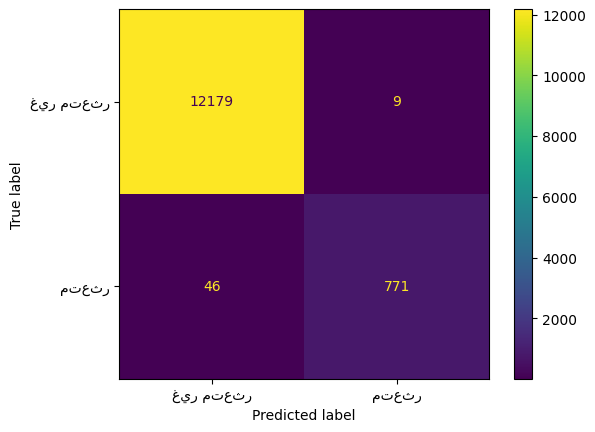

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# أسماء الفئات للعرض (على سبيل المثال، ["غير متعثر", "متعثر"])
target_names = ["غير متعثر", "متعثر"]

# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)

# عرض مصفوفة الارتباك
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()


In [ ]:
# تحديد الأعمدة التي استخدمت في تدريب النموذج
feature_columns = ['الحالة الاجتماعية', 'العمر', 'الحالة الصحية', 'المنطقة', 'المدينة',
                   'دخل رب الأسرة', 'مجموع الدخل', 'عدد الافراد', 'المسكن', 'ملكية المسكن',
                   'قيمة الايجار', 'تصنيف', 'مسار الدعم السكني']

# التأكد من أن البيانات الجديدة تحتوي فقط على الأعمدة المستخدمة في التدريب
new_data_prepared = new_data[feature_columns]

# إذا كنت قد استخدمت StandardScaler في تدريب النموذج، قم بتحجيم البيانات الجديدة
new_data_scaled = scaler.fit_transform(new_data_prepared)

# التنبؤ باستخدام النموذج المحسن
new_data_predictions = best_model.predict(new_data_scaled)

# حساب عدد الأسر المتوقع تعثرهم
num_expected_distressed = sum(new_data_predictions)

print(f'عدد الأسر المتوقع تعثرهم في الدفعات القادمة: {num_expected_distressed}')


عدد الأسر المتوقع تعثرهم في الدفعات القادمة: 4000


In [ ]:
# عرض القيم الفريدة في عمود "المنطقة"
unique_values = new_data['المنطقة'].unique()
print(unique_values)


[nan]


In [ ]:
# إنشاء قاموس لتحويل الأرقام من 0 إلى 12 إلى أسماء المناطق
region_mapping = {
    0: 'الباحة',
    1: 'الجوف',
    2: 'الحدود الشمالية',
    3: 'القصيم',
    4: 'المدينة المنورة',
    5: 'المنطقة الشرقية',
    6: 'تبوك',
    7: 'جازان',
    8: 'حائل',
    9: 'عسير',
    10: 'منطقة الرياض',
    11: 'منطقة مكة المكرمة',
    12: 'نجران'
}

# تحويل الأرقام في عمود "المنطقة" إلى أسماء المناطق باستخدام القاموس
new_data['المنطقة'] = new_data['المنطقة'].map(region_mapping)

# عرض النتيجة
print(new_data['المنطقة'])


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
65017    NaN
65018    NaN
65019    NaN
65020    NaN
65021    NaN
Name: المنطقة, Length: 65022, dtype: object


In [ ]:
# إضافة التوقعات إلى البيانات الجديدة
new_data['financial_distress_prediction'] = new_data_predictions

# حساب عدد الأسر المتوقعة تعثرها حسب المنطقة
distressed_by_region = new_data[new_data['financial_distress_prediction'] == 1].groupby('المنطقة').size()

print(distressed_by_region)


Series([], dtype: int64)
